# Getting Started with `py-distance-transforms`

Welcome to this Jupyter Notebook that will guide you through the basics of using the `py_distance_transforms` package, the Python wrapper for the Julia package DistanceTransforms.jl. This notebook will demonstrate how to perform efficient distance transform operations on arrays using Python.

## Introduction

Distance transforms play a crucial role in many computer vision tasks. The `py_distance_transforms` package facilitates efficient distance transform operations on arrays in Python.

The primary function in `py_distance_transforms` is `transform`. This function processes an array of 0s and 1s, converting each background element (0) into a value representing its squared Euclidean distance to the nearest foreground element (1).

## Installation

To get started, install the `py_distance_transforms` package using pip:

In [1]:
!pip install py_distance_transforms

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [4]:
%pip install FastGeodis

## Basic Usage

Let's begin with a basic example:

**NOTE**: *First time importing `py_distance_transforms` might take a while because of JIT compilation and CUDA installs*

In [2]:
from py_distance_transforms import transform_2d
import numpy as np

[juliapkg] Found dependencies: /usr/local/lib/python3.10/dist-packages/juliacall/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.10/dist-packages/py_distance_transforms/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.10/dist-packages/juliapkg/juliapkg.json
[juliapkg] Locating Julia ~1.9, =1.10.0, ~1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.10.3 to /root/.julia/environments/pyjuliapkg/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[juliapkg] Downloading Julia from https://julialang-s3.julialang.org/bin/linux/x64/1.10/julia-1.10.3-linux-x86_64.tar.gz
             download complete
[julia

In [ ]:
arr = np.random.choice([0, 1], size=(10, 10)).astype(np.float32)
result = transform_2d(arr)
print(result)
print(result.dtype)

[[0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1. 2. 1.]
 [2. 1. 1. 0. 0. 0. 1. 2. 1. 0.]
 [1. 0. 1. 1. 1. 1. 1. 1. 2. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
 [1. 2. 2. 1. 0. 1. 1. 1. 0. 1.]
 [0. 1. 1. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 1. 1. 1. 0. 0.]]
float32


## Visualization
Visualization aids in understanding the effects of the distance transform. We can use matplotlib for this purpose:

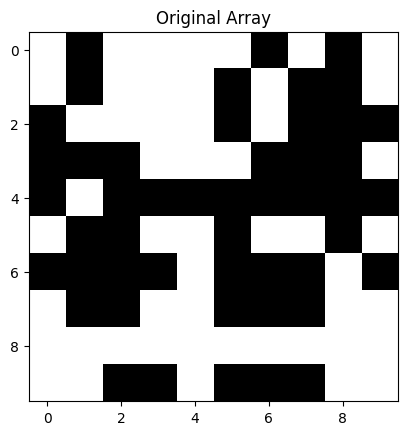

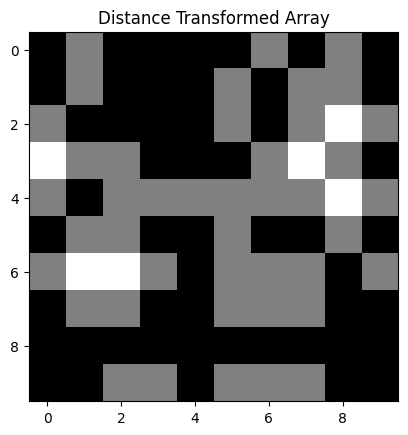

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(arr, cmap='gray')
plt.title('Original Array')
plt.show()

plt.imshow(result, cmap='gray')
plt.title('Distance Transformed Array')
plt.show()

# Intermediate Usage

We can load an example image using PIL to demonstrate a distance transform applied to a real-world scenario:

In [ ]:
from PIL import Image
import requests
from io import BytesIO

In [ ]:
response = requests.get("http://docs.opencv.org/3.1.0/water_coins.jpg")
img = Image.open(BytesIO(response.content)).convert('L')
img_bw = (np.array(img) > 128).astype(np.float32)

img_tfm = transform_2d(img_bw)

Visualization:

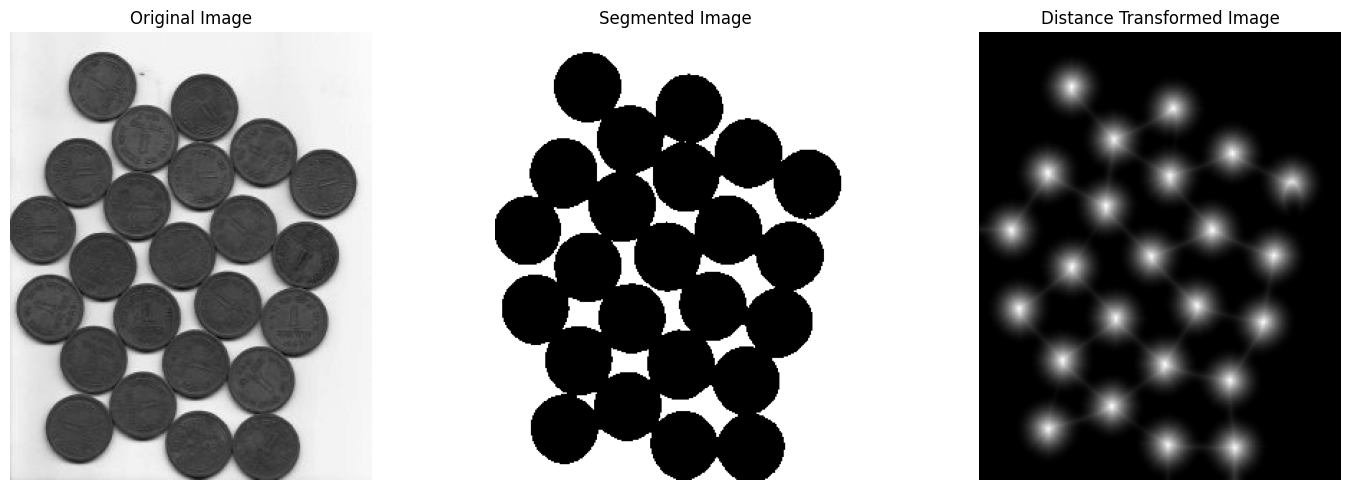

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(img_bw, cmap='gray')
ax2.set_title('Segmented Image')
ax2.axis('off')

ax3.imshow(img_tfm, cmap='gray')
ax3.set_title('Distance Transformed Image')
ax3.axis('off')

plt.tight_layout()
plt.show()

## Helpful Information

### About the Algorithm
`py_distance_transforms` implements sophisticated algorithms for both CPU and GPU environments, ensuring efficient computation regardless of the platform.

**CPU**: On the CPU, `py_distance_transforms` employs the squared Euclidean distance transform algorithm, a method well-documented and respected in computational geometry. This approach, detailed by [Felzenszwalb and Huttenlocher](https://theoryofcomputing.org/articles/v008a019/), is known for its accuracy and efficiency in distance calculations.

**GPU**: For GPU computations, `py_distance_transforms` uses a custom algorithm, optimized for performance across various GPU architectures. This ensures that `py_distance_transforms` can leverage the power of GPUs from different vendors, including NVIDIA (CUDA).

**Simplified Interface**: One of the key features of `py_distance_transforms` is its simplicity for the end user. The complexity of choosing between CPU and GPU algorithms is abstracted away. Users need only call the appropriate `transform_` function based on the dimensionality of their data and whether they are using a GPU.

### Note on Euclidean Distance
The library, by default, returns the squared Euclidean distance, as it is often sufficient for many applications and more computationally efficient. However, for cases where the true Euclidean distance is needed, users can easily obtain it by taking the square root of each element in the transformed array.

Example:

In [ ]:
array2 = np.array([
    [0, 1, 1, 0, 1],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0]
], dtype=np.float32)

sq_euc_transform = transform_2d(array2)
euc_transform = np.sqrt(sq_euc_transform)
sq_euc_transform, euc_transform

(array([[1., 0., 0., 1., 0.],
        [1., 1., 1., 0., 1.],
        [0., 0., 1., 1., 2.]], dtype=float32),
 array([[1.       , 0.       , 0.       , 1.       , 0.       ],
        [1.       , 1.       , 1.       , 0.       , 1.       ],
        [0.       , 0.       , 1.       , 1.       , 1.4142135]],
       dtype=float32))

# Advanced Usage

This section delves into the sophisticated capabilities of `py_distance_transforms`, focusing on its multi-threading and GPU acceleration features. These advanced functionalities are crucial for enhancing performance in complex Python applications, particularly in the fields of image processing and computer vision.

### Multi-threading

`py_distance_transforms` efficiently utilizes multi-threading in its CPU implementations. This parallelization significantly enhances performance, especially for large data sets and high-resolution images.

With Python's multi-threading support, the library can concurrently process distance transform operations, automatically optimizing performance based on the system's capabilities. This leads to faster execution times and increased efficiency in computations, reducing the complexity for the users.

This feature is highly beneficial in scenarios requiring rapid processing, such as real-time computer vision applications and large-scale image analysis. It allows users to focus more on application development rather than on managing computational workloads.

### GPU Acceleration

`py_distance_transforms` extends its performance capabilities by embracing GPU acceleration. This section explores how GPU support is integrated into the library, offering substantial performance enhancements, particularly for large-scale computations.

One of the features of `py_distance_transforms` is its GPU compatibility. When a GPU-compatible array type (like `torch.cuda.FloatTensor`) is passed, `py_distance_transforms` automatically uses the GPU-optimized version of the algorithm.

Example of GPU acceleration in `py_distance_transforms`:

In [ ]:
import torch
from py_distance_transforms import transform_gpu_2d

In [ ]:
x_gpu = torch.rand((100, 100), device='cuda')
x_gpu = (x_gpu > 0.5).float()

gpu_transformed = transform_gpu_2d(x_gpu)
gpu_transformed

tensor([[0., 0., 1.,  ..., 0., 1., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

The use of GPU acceleration in `py_distance_transforms` is particularly advantageous for handling large data sets where the parallel computing capabilities of GPUs can be fully utilized. This results in significantly reduced computation times and increased efficiency, making `py_distance_transforms` a suitable choice for high-performance computing tasks.

## Benchmarks

We can benchmark the performance of `py_distance_transforms` against other Python libraries and compare the CPU and GPU implementations.

Example benchmarking code:

In [ ]:
import timeit
from scipy.ndimage import distance_transform_edt as scipy_transform
from py_distance_transforms import transform_gpu_3d, transform_3d

In [ ]:
arr = np.random.choice([0, 1], size=(224, 224, 112)).astype(np.float32)
tensor = torch.tensor(arr).cuda()

In [ ]:
# run twice, 1st time involves JIT compilation stuff
%timeit transform_gpu_3d(tensor)

53.2 ms ± 2.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# run twice, 1st time involves JIT compilation stuff
%timeit transform_3d(arr)

846 ms ± 221 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit scipy_transform(arr)

1.03 s ± 13.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# # run twice, 1st time involves JIT compilation stuff
# %timeit transform_3d(arr, threaded = False)


The benchmarks should demonstrate the performance improvements offered by `py_distance_transforms`, especially when utilizing multi-threading and GPU acceleration.

This concludes the guide on using `py_distance_transforms` for efficient distance transform operations in Python. Feel free to explore further and leverage the power of this library in your own projects!